# Problem Statement : predict the burned area of forest fires with neural networks. 

In [296]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import callbacks
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [297]:
data = pd.read_csv("forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# EDA and data preprocessing

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [299]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

**no null value**

In [300]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [301]:
data.area.value_counts()

0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64

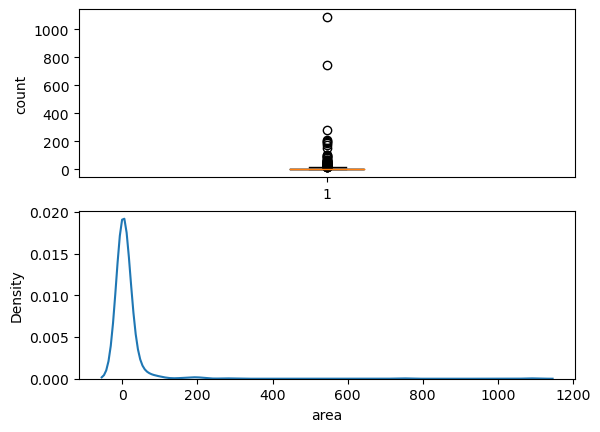

In [302]:
plt.subplot(2, 1, 1)
plt.boxplot(data.area)
plt.ylabel("count")
plt.subplot(2, 1, 2)
sns.kdeplot(data.area)
plt.show()

**input variable "area" has distribution with avery long tail and outliers are present. most of the data under 150 hecters of area** 

In [303]:
big_fires = data.loc[data.area>250,["month","day","area","size_category"]]
big_fires

,month,day,area,size_category
238,sep,sat,1090.84,large
415,aug,thu,746.28,large
479,jul,mon,278.53,large


In [304]:
large_fires = data.loc[data.size_category == 'large',["month","day","area","size_category"]]
large_fires[["month"]].value_counts()

month
sep      51
aug      43
mar      12
jul       9
dec       8
feb       6
oct       4
jun       3
apr       2
may       1
dtype: int64

**most of the large fire incidences happened in the month of Augest and September.**

In [305]:
#dropping data with outliers
data_new = data.drop(data.loc[data.area>250].index, axis = 0)

In [306]:
print(data.shape)
print(data_new.shape)

(517, 31)
(514, 31)


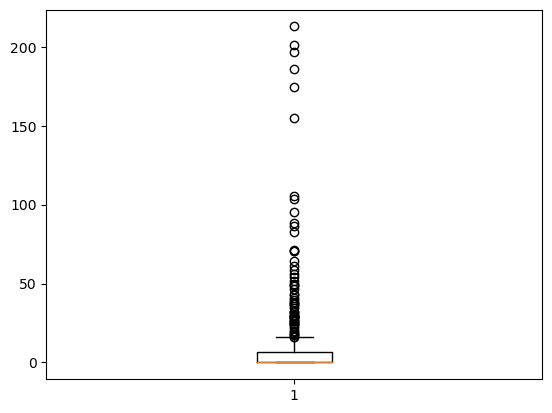

In [307]:
plt.boxplot(data_new.area)
plt.show()

Skew: 5.363445236371602
Kurtosis: 34.13265647425658


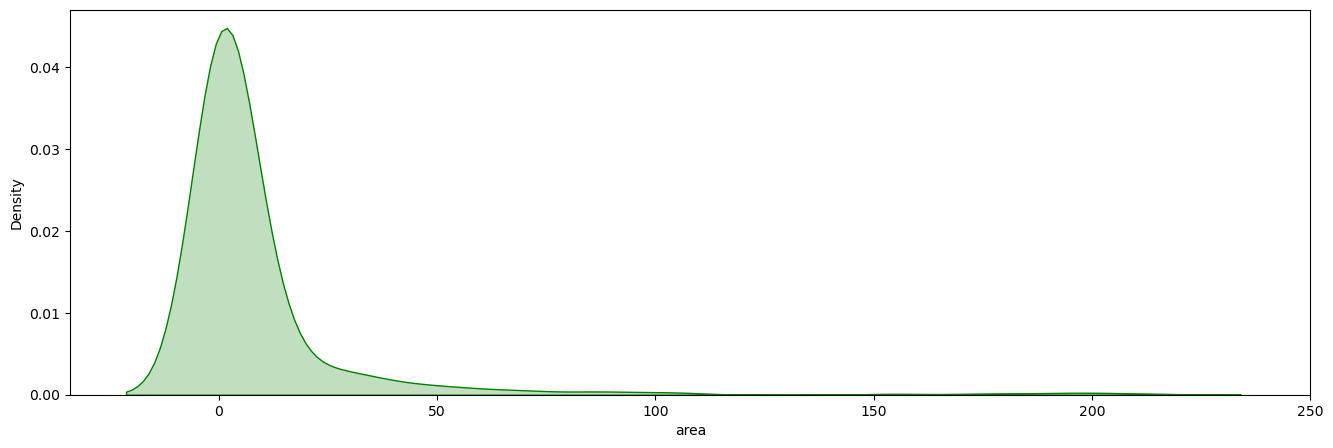

In [308]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(data_new['area'].skew()))
print("Kurtosis: {}".format(data_new['area'].kurtosis()))
ax = sns.kdeplot(data_new['area'],shade=True,color='g')
plt.xticks([i for i in range(0,300,50)])
plt.show()


small    378
large    136
Name: size_category, dtype: int64


C:\Users\Renu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

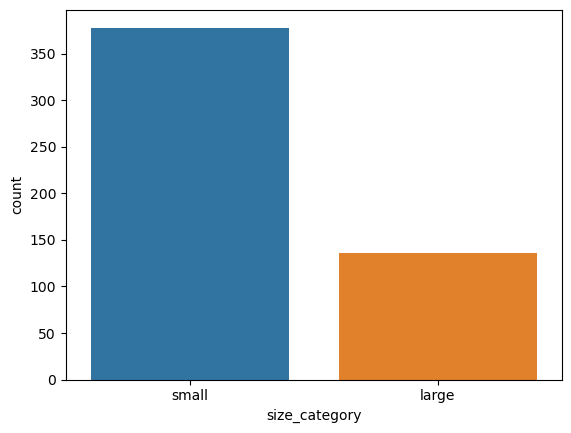

In [309]:
print(data_new["size_category"].value_counts())
sns.countplot(data_new["size_category"])

In [310]:
# since month and day already has dummy indices in the dataset, the two columns can be dropped
data_new.drop(["month", "day"], axis = 1, inplace = True)

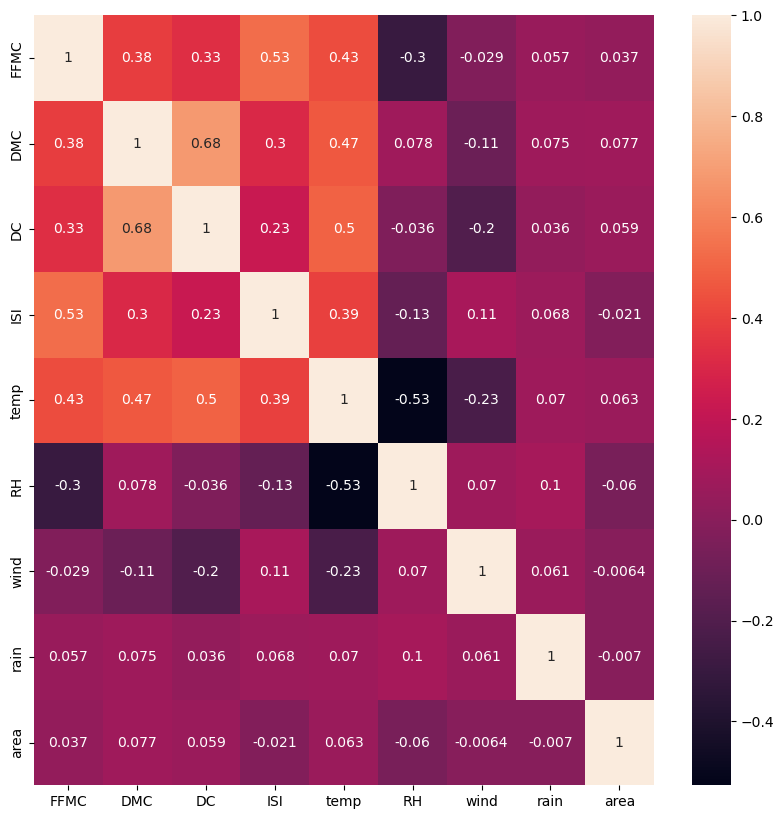

In [311]:
#corr between the numerical input variables
df = data_new.iloc[:,:9]
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),
           annot=True)
plt.show()

<AxesSubplot:>

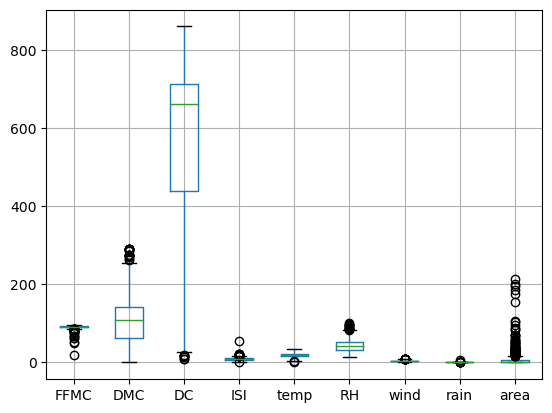

In [312]:
# box plot for the numerical input variables
df.boxplot()

In [313]:
df_input = data_new.iloc[:,0:28]
Y = data_new.iloc[:,28]


In [314]:
#data standerdization for numerical input variables
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_input))
X.columns = df_input.columns
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

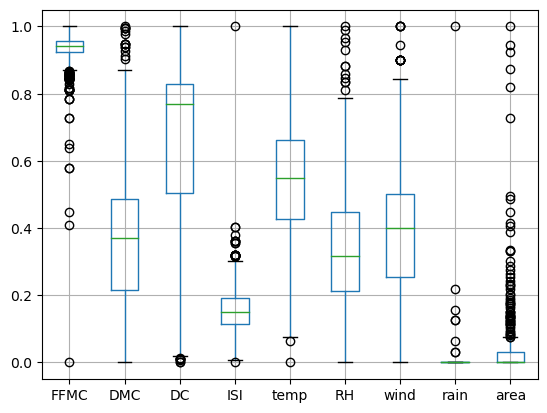

In [315]:
X.iloc[:,:9].boxplot()

In [316]:
# labeling size_category
mapping = {'small': 1, 'large': 2}
Y= Y.replace(mapping)
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    2
513    2
514    2
515    1
516    1
Name: size_category, Length: 514, dtype: int64

In [317]:
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, train_size = 0.80, random_state = 42, stratify = Y)

from imblearn.over_sampling import RandomOverSampler
method = RandomOverSampler(random_state=42, sampling_strategy= 'minority')
x_resampled, y_resampled =  method.fit_resample(x_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_resampled))


Original dataset shape Counter({1: 302, 2: 109})
Resampled dataset shape Counter({2: 302, 1: 302})


In [333]:
x = np.array(x_resampled)
y = np.array(y_resampled)
x.shape

(604, 28)

# Model preparation
**using Grid Search**

In [319]:
#Tuning Epoch and batch size
# create model
from sklearn.model_selection import GridSearchCV, KFold
def create_model():
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [320]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
param_grid = {"batch_size":[10,20,40],
              "epochs" :[50,100,150]}
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=50....................................


C:\Users\Renu\AppData\Local\Temp\ipykernel_51252\2121822116.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


[CV 1/5; 1/9] END .....batch_size=10, epochs=50;, score=0.959 total time=   5.8s
[CV 2/5; 1/9] START batch_size=10, epochs=50....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=50;, score=0.959 total time=   4.7s
[CV 3/5; 1/9] START batch_size=10, epochs=50....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=50;, score=0.983 total time=   8.2s
[CV 4/5; 1/9] START batch_size=10, epochs=50....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=50;, score=0.992 total time=   4.7s
[CV 5/5; 1/9] START batch_size=10, epochs=50....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=50;, score=1.000 total time=   4.5s
[CV 1/5; 2/9] START batch_size=10, epochs=100...................................
[CV 1/5; 2/9] END ....batch_size=10, epochs=100;, score=0.256 total time=   8.9s
[CV 2/5; 2/9] START batch_size=10, epochs=100...................................
[CV 2/5; 2/9] END ....batch_

In [321]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9785124063491821, using {'batch_size': 10, 'epochs': 50}
0.9785124063491821,0.017017557935863566 with: {'batch_size': 10, 'epochs': 50}
0.8380165338516236,0.2910499310281508 with: {'batch_size': 10, 'epochs': 100}
0.8314049720764161,0.28803046731471504 with: {'batch_size': 10, 'epochs': 150}
0.8380165338516236,0.27902080083518604 with: {'batch_size': 20, 'epochs': 50}
0.9718319535255432,0.013496512841139962 with: {'batch_size': 20, 'epochs': 100}
0.9785124063491821,0.017017557935863566 with: {'batch_size': 20, 'epochs': 150}
0.9619559288024903,0.014368553435528727 with: {'batch_size': 40, 'epochs': 50}
0.9768595099449158,0.014218717857736091 with: {'batch_size': 40, 'epochs': 100}
0.8330578446388245,0.2769470668319827 with: {'batch_size': 40, 'epochs': 150}


In [322]:
#tuning dropoutrate and learning rate using epochs 50 and batch size 40
from keras.layers import Dropout

# Defining the model

def create_model1(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model1,verbose = 0,batch_size = 10,epochs = 50)

# Define the grid search parameters

param_grids = {"learning_rate":[0.001,0.01,0.1],
               "dropout_rate":[0.0,0.1,0.2]}
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Renu\AppData\Local\Temp\ipykernel_51252\429198344.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model1,verbose = 0,batch_size = 10,epochs = 50)


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.950 total time=   5.1s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.967 total time=   5.0s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.959 total time=   4.7s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.934 total time=   4.7s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.808 total time=   4.7s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.959 total time=   4.8s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01......

In [323]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9669421672821045, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9236501455307007,0.05868576221672005 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9669421672821045,0.022783544080106903 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.21322313845157623,0.1100632835860323 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7504132390022278,0.3755887016732411 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.8429752111434936,0.28113754464200397 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.4314049631357193,0.35609767126913666 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9519697070121765,0.012226217155983004 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9369972348213196,0.042254640159182864 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.21322313845157623,0.1100632835860323 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [324]:
# Tuning actibvation funtion and kernel initializer
#Defining the model

def create_model2(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(4,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 10,epochs = 50)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=uniform...................


C:\Users\Renu\AppData\Local\Temp\ipykernel_51252\1729808322.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 10,epochs = 50)


[CV 1/5; 1/9] END activation_function=softmax, init=uniform;, score=0.579 total time=   4.9s
[CV 2/5; 1/9] START activation_function=softmax, init=uniform...................
[CV 2/5; 1/9] END activation_function=softmax, init=uniform;, score=0.785 total time=   4.9s
[CV 3/5; 1/9] START activation_function=softmax, init=uniform...................
[CV 3/5; 1/9] END activation_function=softmax, init=uniform;, score=0.504 total time=   4.8s
[CV 4/5; 1/9] START activation_function=softmax, init=uniform...................
[CV 4/5; 1/9] END activation_function=softmax, init=uniform;, score=0.744 total time=   4.8s
[CV 5/5; 1/9] START activation_function=softmax, init=uniform...................
[CV 5/5; 1/9] END activation_function=softmax, init=uniform;, score=0.433 total time=   4.8s
[CV 1/5; 2/9] START activation_function=softmax, init=normal....................
[CV 1/5; 2/9] END activation_function=softmax, init=normal;, score=0.620 total time=   4.8s
[CV 2/5; 2/9] START activation_functio

In [325]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9818044185638428, using {'activation_function': 'tanh', 'init': 'uniform'}
0.6089807033538819,0.13562938671115812 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.5938567578792572,0.17723156545550195 with: {'activation_function': 'softmax', 'init': 'normal'}
0.21322313845157623,0.1100632835860323 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8213774204254151,0.25827974796168635 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9420661211013794,0.022754145224662528 with: {'activation_function': 'relu', 'init': 'normal'}
0.21322313845157623,0.1100632835860323 with: {'activation_function': 'relu', 'init': 'zero'}
0.9818044185638428,0.014209129544354765 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9735261797904968,0.013202587218819777 with: {'activation_function': 'tanh', 'init': 'normal'}
0.21322313845157623,0.1100632835860323 with: {'activation_function': 'tanh', 'init': 'zero'}


In [326]:
#Tuning number of neurons
# Defining the model

def create_model3(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam, metrics = ['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model3,verbose = 0,batch_size = 10,epochs = 50)

# Define the grid search parameters
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\Renu\AppData\Local\Temp\ipykernel_51252\621153135.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model3,verbose = 0,batch_size = 10,epochs = 50)


[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.934 total time=   4.7s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.983 total time=   4.6s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.909 total time=   4.6s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.917 total time=   4.6s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   4.6s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.950 total time=   4.6s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 2/5; 2/9] END .........n

In [327]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9718319654464722, using {'neuron1': 16, 'neuron2': 8}
0.7487603425979614,0.3752685051673635 with: {'neuron1': 4, 'neuron2': 2}
0.7432644724845886,0.23836306060497275 with: {'neuron1': 4, 'neuron2': 4}
0.8686501383781433,0.16906812209914363 with: {'neuron1': 4, 'neuron2': 8}
0.6275895267724991,0.3133777648717073 with: {'neuron1': 8, 'neuron2': 2}
0.9169421553611755,0.08363456987006636 with: {'neuron1': 8, 'neuron2': 4}
0.9368319749832154,0.0778098934104271 with: {'neuron1': 8, 'neuron2': 8}
0.960330581665039,0.0211673573745819 with: {'neuron1': 16, 'neuron2': 2}
0.9669421553611756,0.021551086713816645 with: {'neuron1': 16, 'neuron2': 4}
0.9718319654464722,0.011292254112658235 with: {'neuron1': 16, 'neuron2': 8}


In [338]:
from sklearn.metrics import classification_report, accuracy_score
# final model
# Defining the model

def create_model4():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(8,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model4,verbose = 0,batch_size = 10,epochs = 50)

# Fitting the model
history = model.fit(x,y)

# Predicting using trained model
y_predict = model.predict(x_valid)

# Printing the metrics
print(accuracy_score(y_valid,y_predict))

C:\Users\Renu\AppData\Local\Temp\ipykernel_51252\959614363.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model4,verbose = 0,batch_size = 10,epochs = 50)


4/4 [==============================] - 0s 2ms/step
0.9514563106796117


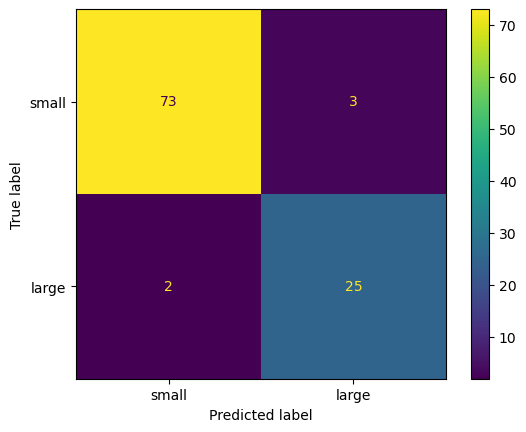

In [348]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
class_names = ['small','large']
cm = confusion_matrix(y_valid,y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

cm_display.plot()
plt.show()


AUC: 0.824


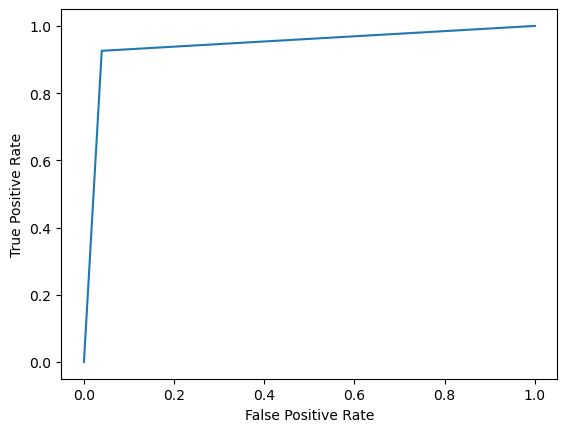

In [349]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_valid, y_predict, pos_label=2)
auc = roc_auc_score(y_valid, preds)
print('AUC: %.3f' % auc)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Conclusion: firstly, Performed random oversampling on the dataset to get a balance data. Then used hyperparameter tuning to tune the model parameters.
The final CNN model has three layers with the following parameters:
Batch size = 10  
Epochs = 50  
learning rate = 0.01  
dropout rate = 0.0  
neurons 1 = 16  
neurons 2 = 8 
activation function = tanh  
kernel_initializer = uniform** 

model accuracy = 95.14%  
area under ROC curve = 0.824**